# 1. Business Understanding/Problem
  In today's cutthroat business world, sales professionals are caught in a vicious cycle:
  Skyrocketing quotas and tighter deadlines; Drowning in complex CRM systems; Inundated with prospects, but no clear path to conversion
  The result? A waste of time nurturing leads unlikely to convert, instead of laser-focusing on high-potential opportunities.
  
# 2. Project Goals
We're leveraging a Kaggle Sales CRM [https://www.kaggle.com/code/amr7ac/crm-sales-opportunities-analysis/input]. dataset to build a game-changing classification model that will:

     1.Identify and tag "Won Opportunity" prospects
     
     2.Arm salespeople with a curated list of high-conversion potential leads
     
     3.Eliminate guesswork and random prospecting

This AI-powered approach will revolutionize sales efficiency, allowing sales professionals to:

     1. Engage the RIGHT customers
     
     2. Address typical features that drive the propensity to convert up or down
     
     3. Directly increase conversion rates and indirectly the revenue

By harnessing the power of data-driven insights, we're transforming the sales landscape from a scattergun approach to a precision-guided missile of success.

# 3. About the Dataset

[https://www.kaggle.com/code/amr7ac/crm-sales-opportunities-analysis/input] This dataset contains information about customer interactions, sales activities, and opportunities from a fictional company's CRM (Customer Relationship Management) system. The fictional dataset is designed to help data scientists and analytics understand the sales process, identify trends and patterns, and build predictive models to improve sales performance. The dataset contains 4 key CSV's

1. Account.csv: Contains the company information including name, demographic and firmographic information
2. Products.csv: Information about products and prices
3. sales_pipeline.csv: Information about the opportunities including key columns that reference the  customer, product, product , sales team , status and value
4. sales_team.csv: The master data of different sales rep constituting a sales team 




# 4. EDA
   Let us explore the dataset. 

   1. Import key libraries like pandas, mapplotlib,sklearn,plotly..etc from the previous practical application
   2. Basic Data Analysis
   3. Shape of the Data
   4. Histograms
   5. Categorical Values Handling
   6. Denormalizing
   7. BaselIne modelling

In [390]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import time
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import HuberRegressor, LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#create a logistic regression model and fit it to the churn data and classify the data based on "churn" column
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.utils import resample
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn import set_config
set_config(display="diagram")
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import roc_auc_score,precision_recall_curve, roc_curve,confusion_matrix,accuracy_score,f1_score, recall_score, precision_score, ConfusionMatrixDisplay

import datetime

import warnings
warnings.filterwarnings('ignore')

## 4.1 Read Dataframes

In [391]:
account_df = pd.read_csv('data/accounts.csv')
products_df = pd.read_csv('data/products.csv')
sales_teams_df = pd.read_csv('data/sales_teams.csv')
sales_pipeline_df = pd.read_csv('data/sales_pipeline.csv')

## 4.2 Determine Shape

In [392]:
print(account_df.shape)
print(products_df.shape)
print(sales_teams_df.shape)
print(sales_pipeline_df.shape)

(85, 7)
(7, 3)
(35, 3)
(8800, 8)


### 4.2.1 Observations

    1. The account table which homes customer data has data pertaining to 85 customers
    
    2.The product table homes the master data for all the 7 products/offers this fictitious company sells
    
    3. The Sales team table homes the data of 35 sales team members and their managers working for this fictitious company

    4. Sales pipeline table contain the opportunity data for 8800 opportunities with respective statuses, amounts..etc
    

## 4.3 Describe Tables

In [393]:
print(account_df.info())
print(products_df.info())
print(sales_teams_df.info())
print(sales_pipeline_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
 6   subsidiary_of     15 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product      7 non-null      object
 1   series       7 non-null      object
 2   sales_price  7 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 300.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Range

# 5 EDA and Preprocessing

In [394]:
print(account_df.head())
print(products_df.head())
print(sales_teams_df.head())
print(sales_pipeline_df.head())

            account     sector  year_established  revenue  employees  \
0  Acme Corporation  technolgy              1996  1100.04       2822   
1        Betasoloin    medical              1999   251.41        495   
2          Betatech    medical              1986   647.18       1185   
3        Bioholding    medical              2012   587.34       1356   
4           Bioplex    medical              1991   326.82       1016   

  office_location subsidiary_of  
0   United States           NaN  
1   United States           NaN  
2           Kenya           NaN  
3      Philipines           NaN  
4   United States           NaN  
        product series  sales_price
0     GTX Basic    GTX          550
1       GTX Pro    GTX         4821
2    MG Special     MG           55
3   MG Advanced     MG         3393
4  GTX Plus Pro    GTX         5482
         sales_agent           manager regional_office
0      Anna Snelling  Dustin Brinkmann         Central
1     Cecily Lampkin  Dustin Brinkman

## 5.1 Null Checks and Convert Date columns

In [395]:
print(account_df.isnull().sum())
print(products_df.isnull().sum())
print(sales_teams_df.isnull().sum())
print(sales_pipeline_df.isnull().sum())
sales_pipeline_df['engage_date']=pd.to_datetime(sales_pipeline_df['engage_date'])
sales_pipeline_df['close_date']=pd.to_datetime(sales_pipeline_df['close_date'])
sales_pipeline_df['days_opportunity_open']=(sales_pipeline_df['close_date']-sales_pipeline_df['engage_date'])/pd.Timedelta(days=1)


account              0
sector               0
year_established     0
revenue              0
employees            0
office_location      0
subsidiary_of       70
dtype: int64
product        0
series         0
sales_price    0
dtype: int64
sales_agent        0
manager            0
regional_office    0
dtype: int64
opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64


In [396]:
null_rows = sales_pipeline_df[sales_pipeline_df['close_date'].isnull()]
null_rows2 = sales_pipeline_df[sales_pipeline_df['close_value'].isnull()]

print("Rows where 'close_date' is null:")
print(null_rows['deal_stage'].unique())
print("Rows where 'close_value' is null:")
print(null_rows2['deal_stage'].unique())

Rows where 'close_date' is null:
['Engaging' 'Prospecting']
Rows where 'close_value' is null:
['Engaging' 'Prospecting']


## 5.1.1 Observations

1. Subsidary_of is NULL on 70 rows out of 85. This is OK as not all companies would need to have a subsidiary
2. The opportunity team has 1425 records without a reference account. Functionally , an opportunity should always be associated with an opportunity . This is an anomaly and we might need a smart fix to make this dataset relevant for the exercise , by distributing the null opportunities with the top few accounts. Realized all of these are for open opportunities( so leaving it ASIS)
3. The close_date and close_value is null for 2089 record. This is quite possible if the deal stage is neither won or lost , but is in the nurture stage. As can be inferred from the above logic, the values of 'Engaging' and 'Prospecting' are evidence for the same. In an ideal world we shuld get rid of these records from test and train 

## 5.2 Find Duplicates

In [397]:
#Find Duplicates
account_dups=account_df.duplicated()
prod_dups=products_df.duplicated()
sales_teams_dups=sales_teams_df.duplicated()
sales_pipe_dups=sales_pipeline_df.duplicated()
print(account_dups.shape)
print(prod_dups.shape)
print(sales_pipe_dups.shape)
print(sales_teams_dups.shape)

# No Duplicates found

(85,)
(7,)
(8800,)
(35,)


## 5.3 Unique Key Checks

In [398]:
# Check if Opportunity ID is unique in Opportunity Data and Customer Name is unique in the Account Table
is_unique_opp=sales_pipeline_df["opportunity_id"].is_unique
print(f"Opportunity Id is unique is: {is_unique_opp}")
is_unique_cname=account_df["account"].is_unique
print(is_unique_cname)


Opportunity Id is unique is: True
True


## 5.4 Filter Irrelevant Data

In [399]:
# Filter the data remove opportunities without closed date
filtered_opportunity_df = sales_pipeline_df[sales_pipeline_df['close_date'].notnull()]
filtered_opportunity_df.shape

# Drop the date columns as it might not have an influence on the model and the number of unique values are a lot to do analysis. We have captured the age of the opportunity instead
filtered_opportunity_df = filtered_opportunity_df.drop(columns=['close_date', 'engage_date'])

## 5.5 Denormalize Data

In [400]:
### Join Data and create a denormalized dataframe 

merged_crm_df = pd.merge(filtered_opportunity_df, account_df, on='account', how='left')
merged_crm_df = pd.merge(merged_crm_df, products_df, on='product', how='left')
merged_crm_df = pd.merge(merged_crm_df, sales_teams_df, on='sales_agent', how='left')
print(merged_crm_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6711 entries, 0 to 6710
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   opportunity_id         6711 non-null   object 
 1   sales_agent            6711 non-null   object 
 2   product                6711 non-null   object 
 3   account                6711 non-null   object 
 4   deal_stage             6711 non-null   object 
 5   close_value            6711 non-null   float64
 6   days_opportunity_open  6711 non-null   float64
 7   sector                 6711 non-null   object 
 8   year_established       6711 non-null   int64  
 9   revenue                6711 non-null   float64
 10  employees              6711 non-null   int64  
 11  office_location        6711 non-null   object 
 12  subsidiary_of          1160 non-null   object 
 13  series                 5564 non-null   object 
 14  sales_price            5564 non-null   float64
 15  mana

## 5.6 Categorical Column Analysis and Handling

In [401]:
categorical_cols = merged_crm_df.select_dtypes(include=['object'])
for col in categorical_cols.columns:
    print(f"Column: {col}")
    print("--------------------------------------")
    print("Distinct Value count for this column:")
    print(merged_crm_df[col].nunique())
    print("\n")
    print("Unique values and counts:")
    print(merged_crm_df[col].value_counts())
    print("\n")

Column: opportunity_id
--------------------------------------
Distinct Value count for this column:
6711


Unique values and counts:
opportunity_id
RB8GDYFY    1
1C1I7A6R    1
Z063OYW0    1
EC4QE1BX    1
MV1LWRNH    1
           ..
S8DX3XOU    1
KWVA7VR1    1
NL3JZH1Z    1
OLK9LKZB    1
7GN8Q4LL    1
Name: count, Length: 6711, dtype: int64


Column: sales_agent
--------------------------------------
Distinct Value count for this column:
30


Unique values and counts:
sales_agent
Darcel Schlecht       553
Vicki Laflamme        347
Anna Snelling         336
Kary Hendrixson       335
Donn Cantrell         275
Kami Bicknell         272
Jonathan Berthelot    264
Versie Hillebrand     264
Zane Levy             261
Cassey Cress          261
Reed Clapper          237
Gladys Colclough      232
Lajuana Vencill       231
Corliss Cosme         229
Markita Hansen        227
Maureen Marcano       213
James Ascencio        206
Moses Frase           195
Marty Freudenburg     194
Violet Mclelland      

Index(['opportunity_id', 'sales_agent', 'product', 'account', 'deal_stage',
       'sector', 'office_location', 'subsidiary_of', 'series', 'manager',
       'regional_office'],
      dtype='object')
<class 'str'>
opportunity_id
<class 'str'>
sales_agent


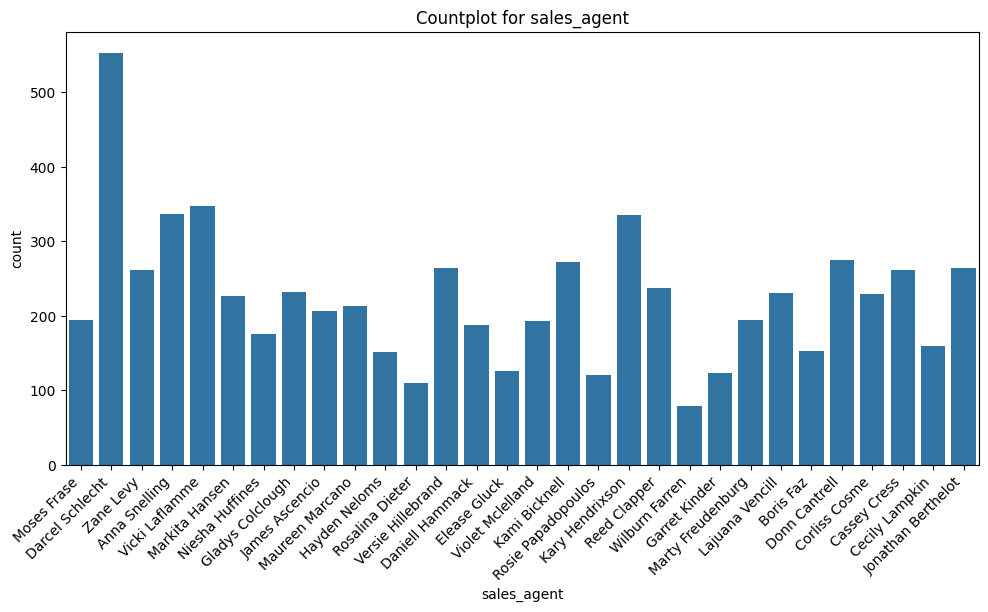

<class 'str'>
product


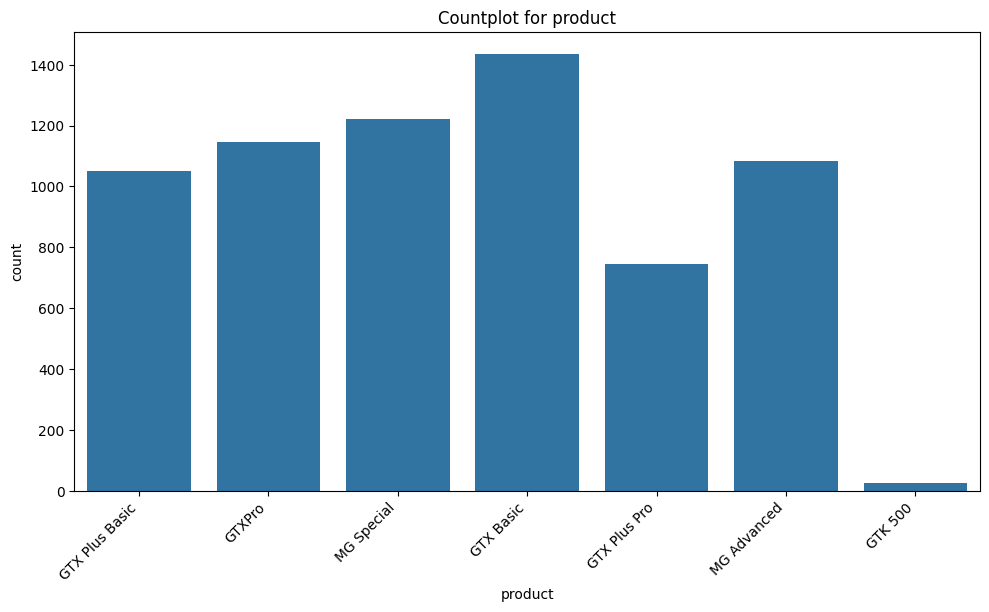

<class 'str'>
account


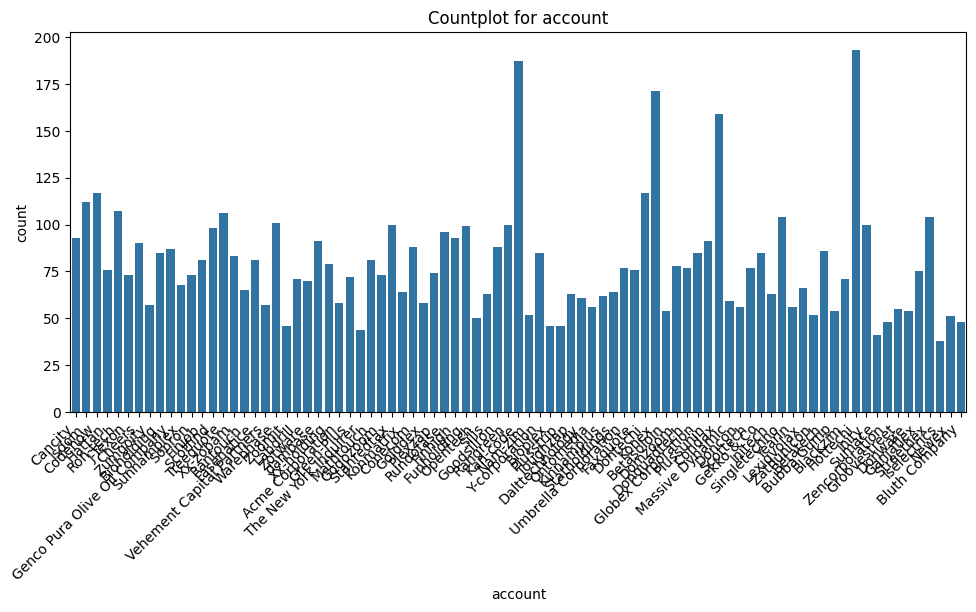

<class 'str'>
deal_stage


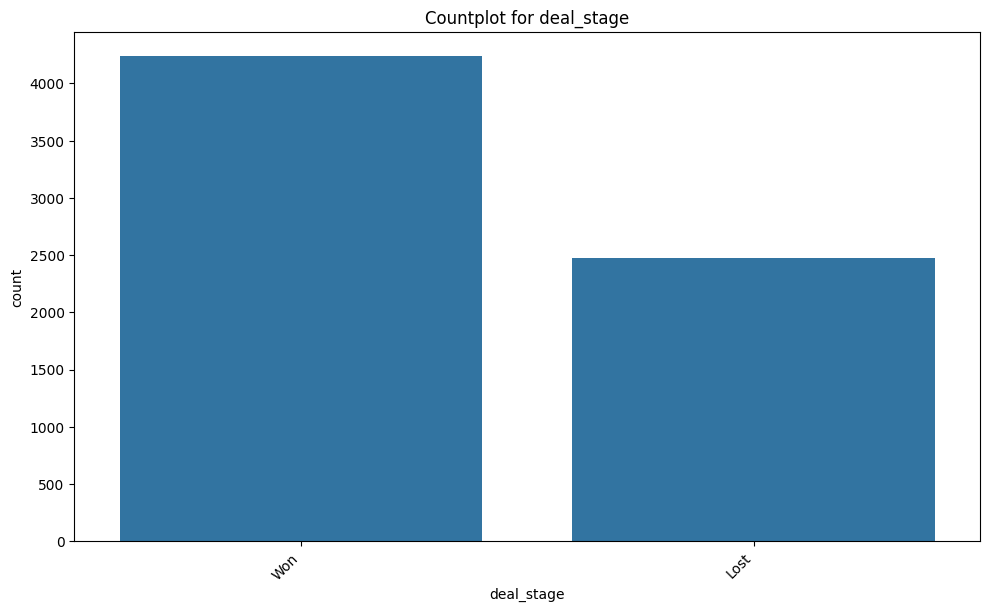

<class 'str'>
sector


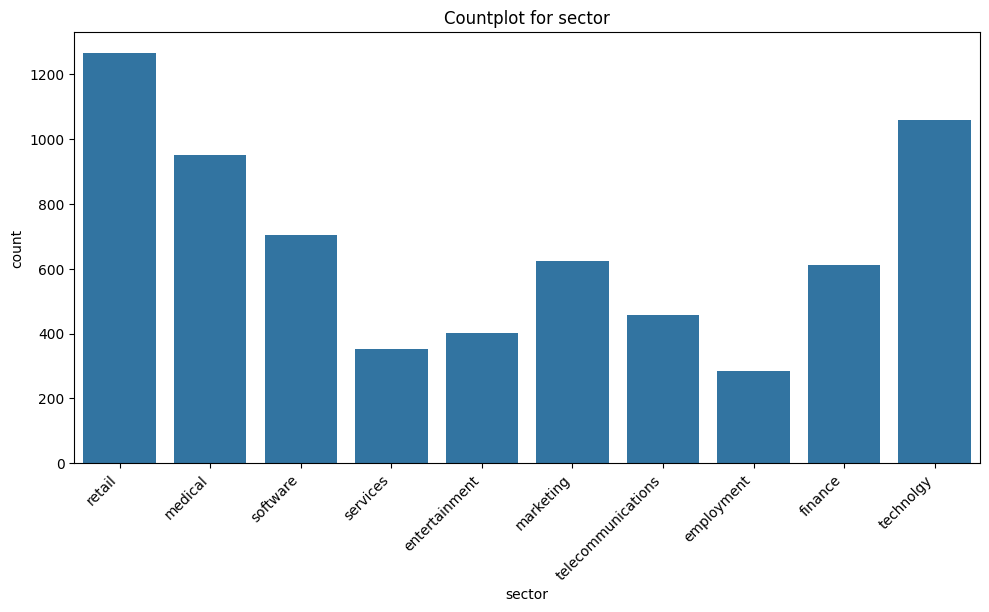

<class 'str'>
office_location


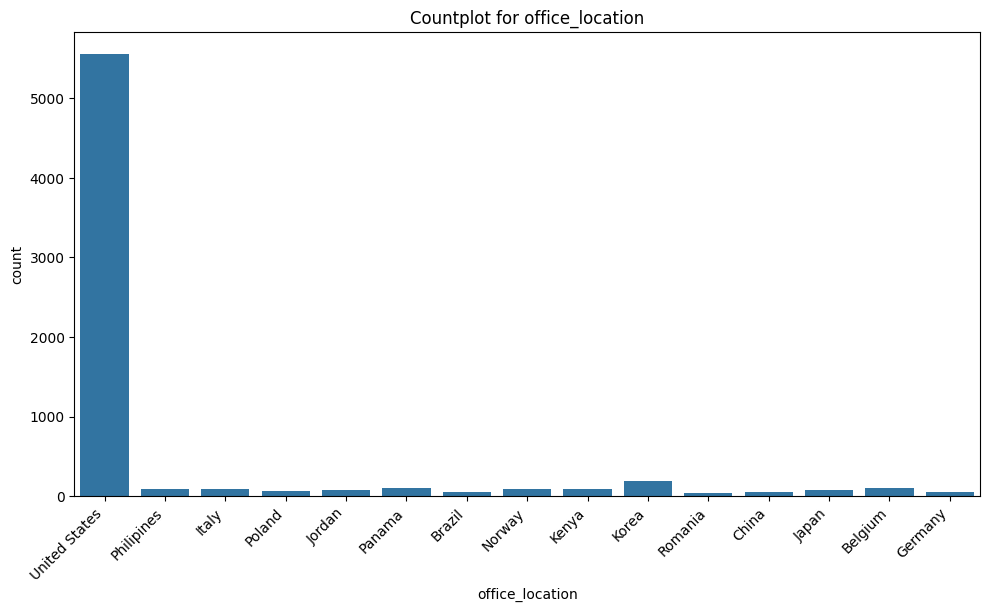

<class 'str'>
subsidiary_of


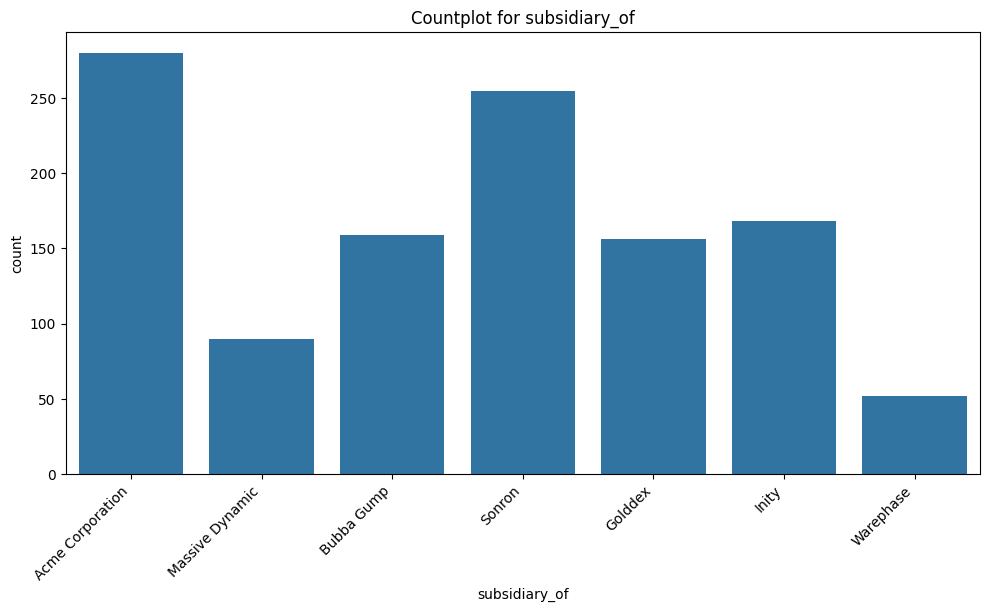

<class 'str'>
series


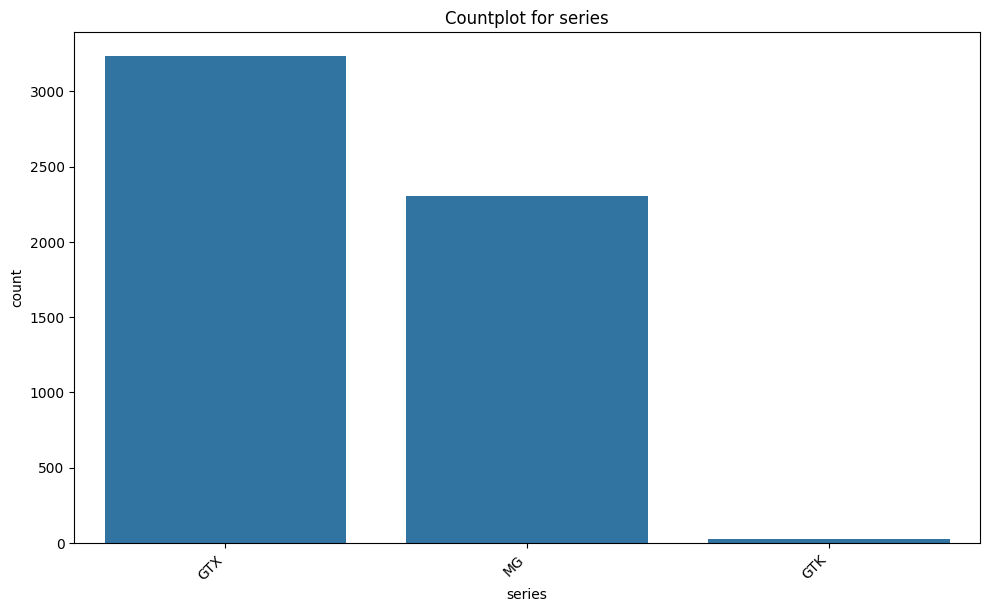

<class 'str'>
manager


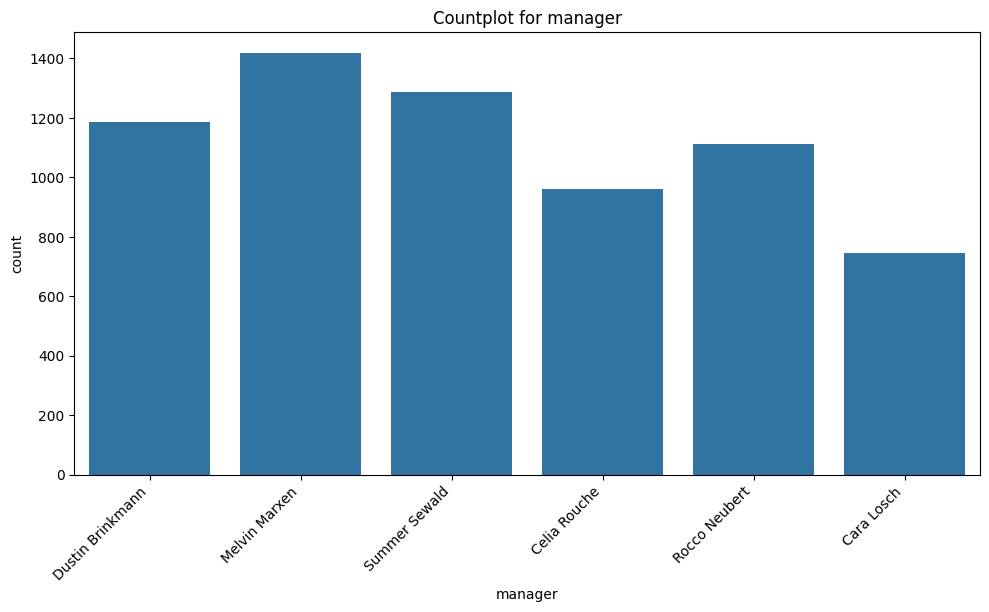

<class 'str'>
regional_office


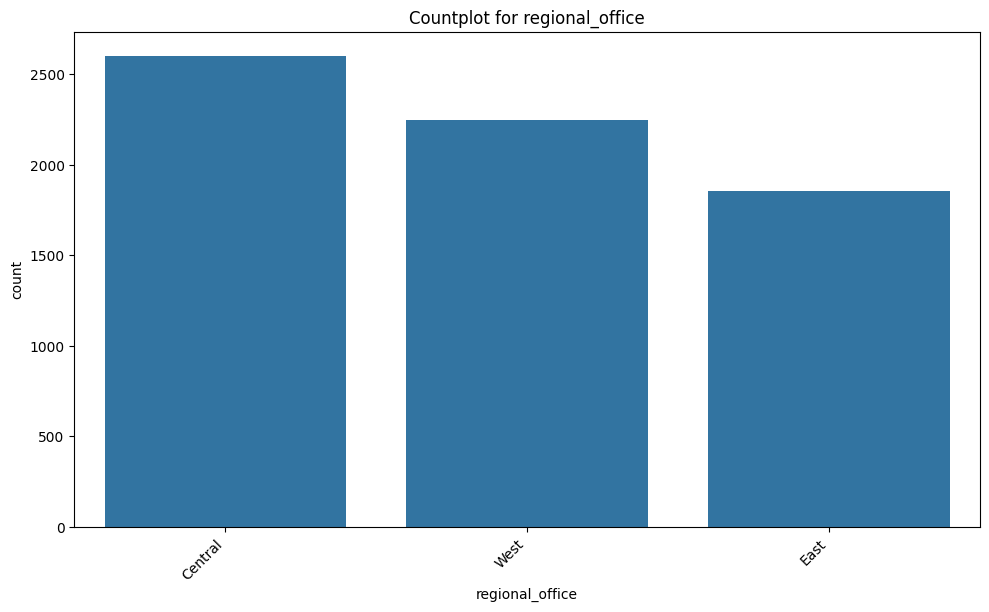

In [402]:
print(categorical_cols.columns)
for col in categorical_cols.columns:
    print(type(col))
    print(col)
    if (col!="opportunity_id"):
        plt.figure(figsize=(10,6))
        sns.countplot(x=col, data=merged_crm_df)
        plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
        plt.tight_layout()  # Ensure labels fit within the figure area
        plt.title(f'Countplot for {col}')
        plt.show()
        

### 5.6.1 Observations
1. Regional bias on US Customer data. More than 85% data pertains to customers in the US
2. The sample has more Won opportunities than lost
3. Sector bias on retail, Medical and Tech, software. Not so much on the services, entertainment, communications and employment sectors
4. Neglible data for product family GTK

## 5.7 Numerical Data Handling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6711 entries, 0 to 6710
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   close_value            6711 non-null   float64
 1   days_opportunity_open  6711 non-null   float64
 2   year_established       6711 non-null   int64  
 3   revenue                6711 non-null   float64
 4   employees              6711 non-null   int64  
 5   sales_price            5564 non-null   float64
 6   win_loss_indicator     6711 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 367.1 KB
None


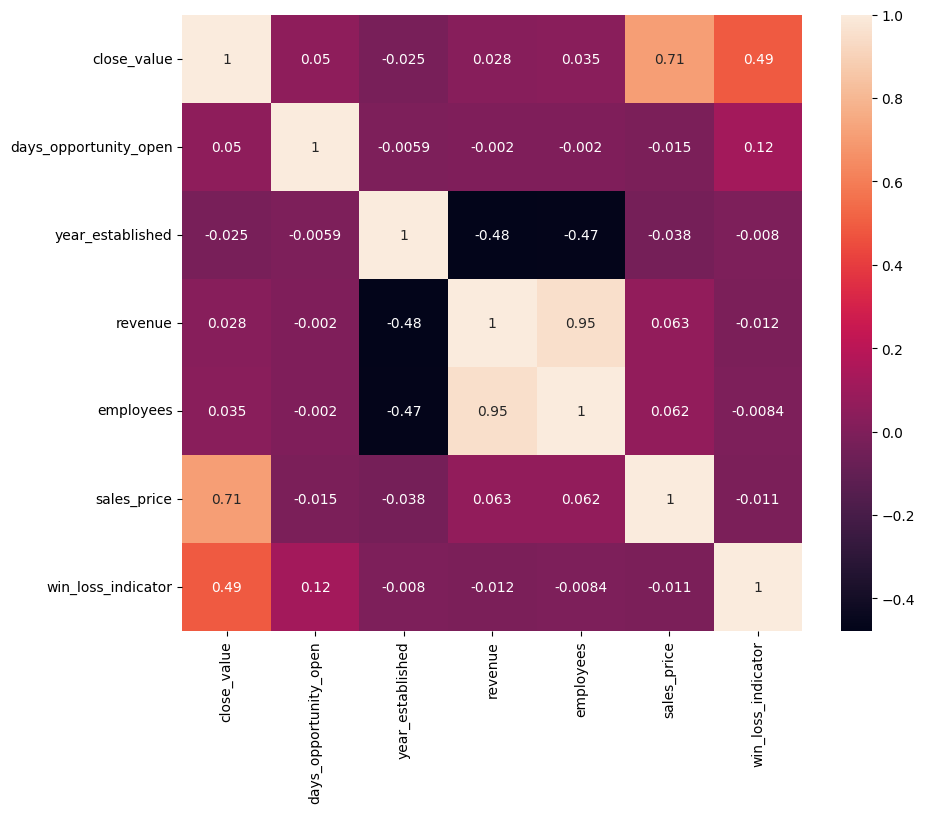

In [403]:
### Churn Indicator modelled as Boolean Yes and No
merged_crm_df2 = merged_crm_df
merged_crm_df2['win_loss_indicator'] = merged_crm_df['deal_stage'].map({'Won': 1, 'Lost': 0})
non_numeric_columns = merged_crm_df2.select_dtypes(include=['object']).columns

# Copy non numeric columns in a separate dataframe to generate the heatmap for correlation across numerical variables
merged_crm_df2_numeric = merged_crm_df2.drop(non_numeric_columns, axis=1)
print(merged_crm_df2_numeric.info())
plt.figure(figsize=(10, 8))
sns.heatmap(merged_crm_df2_numeric.corr(), annot=True)
plt.show()

## 5.7.1 Observation
1. Heatmap does not indicate any strong relationship between the numerical attributes and the target variable
2. The best one with the sales_price is also a low value of -.011
3. the below plot is another depiction which comes to the same conclusion

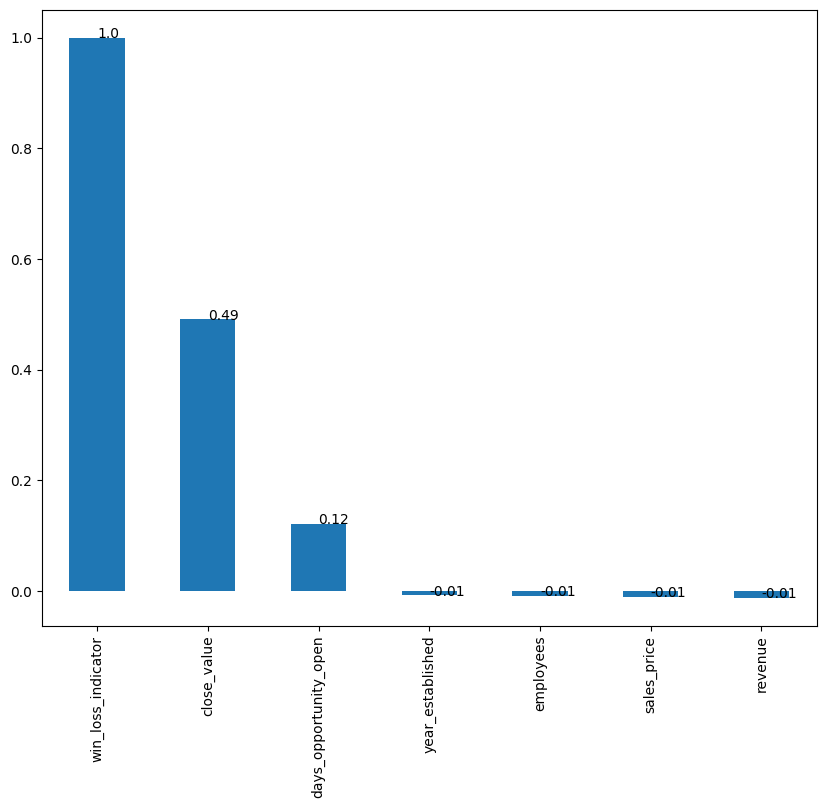

In [404]:
plt.figure(figsize=(10, 8))
merged_crm_df2_numeric.corr()['win_loss_indicator'].sort_values(ascending=False).plot(kind='bar')
# show the value on the bar
for i in range(len(merged_crm_df2_numeric.corr()['win_loss_indicator'].sort_values(ascending=False))):
    plt.text(i, merged_crm_df2_numeric.corr()['win_loss_indicator'].sort_values(ascending=False)[i], round(merged_crm_df2_numeric.corr()['win_loss_indicator'].sort_values(ascending=False)[i], 2))
    
plt.show()

## 5.7.1 Low correlation

1. Out of the numerical values close_value with a correlation of 0.49 and days_opportunity_open with a value of 0.12 have the highest linnear correlation.The rest are neglible 

In [405]:
merged_crm_df2 = merged_crm_df2.drop(columns=['year_established', 'opportunity_id','deal_stage','subsidiary_of'])

## 5.8: Additional Null Handling Scenario

In [406]:
merged_crm_df2.info()
merged_crm_df2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6711 entries, 0 to 6710
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sales_agent            6711 non-null   object 
 1   product                6711 non-null   object 
 2   account                6711 non-null   object 
 3   close_value            6711 non-null   float64
 4   days_opportunity_open  6711 non-null   float64
 5   sector                 6711 non-null   object 
 6   revenue                6711 non-null   float64
 7   employees              6711 non-null   int64  
 8   office_location        6711 non-null   object 
 9   series                 5564 non-null   object 
 10  sales_price            5564 non-null   float64
 11  manager                6711 non-null   object 
 12  regional_office        6711 non-null   object 
 13  win_loss_indicator     6711 non-null   int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 734.1+ 

sales_agent                 0
product                     0
account                     0
close_value                 0
days_opportunity_open       0
sector                      0
revenue                     0
employees                   0
office_location             0
series                   1147
sales_price              1147
manager                     0
regional_office             0
win_loss_indicator          0
dtype: int64

In [407]:
#Examine Null Records for series
null_series_df = merged_crm_df2[merged_crm_df2['series'].isnull()]
null_series_df.head(10)


,sales_agent,product,account,close_value,days_opportunity_open,sector,revenue,employees,office_location,series,sales_price,manager,regional_office,win_loss_indicator
1,Darcel Schlecht,GTXPro,Isdom,4514.0,137.0,medical,3178.24,4540,United States,NaN,NaN,Melvin Marxen,Central,1
10,Gladys Colclough,GTXPro,Genco Pura Olive Oil Company,0.0,134.0,retail,894.33,1635,Italy,NaN,NaN,Melvin Marxen,Central,0
17,Daniell Hammack,GTXPro,Xx-zobam,0.0,122.0,entertainment,3838.39,8274,United States,NaN,NaN,Rocco Neubert,East,0
27,Maureen Marcano,GTXPro,Labdrill,4899.0,123.0,medical,2741.37,9226,United States,NaN,NaN,Summer Sewald,West,1
30,James Ascencio,GTXPro,Xx-holding,4338.0,114.0,finance,7537.24,20293,United States,NaN,NaN,Summer Sewald,West,1
50,Darcel Schlecht,GTXPro,Funholding,0.0,118.0,finance,2819.50,7227,United States,NaN,NaN,Melvin Marxen,Central,0
52,Boris Faz,GTXPro,Opentech,4704.0,123.0,finance,355.23,853,United States,NaN,NaN,Rocco Neubert,East,1
61,Kary Hendrixson,GTXPro,Y-corporation,5539.0,113.0,employment,2871.35,9561,United States,NaN,NaN,Summer Sewald,West,1
63,Marty Freudenburg,GTXPro,Conecom,4926.0,100.0,technolgy,1520.66,1806,United States,NaN,NaN,Melvin Marxen,Central,1
66,Darcel Schlecht,GTXPro,Gogozoom,4359.0,112.0,telecommunications,86.68,187,United States,NaN,NaN,Melvin Marxen,Central,1


In [408]:
# Handle Nulls
# Observed the product master has GTX Pro and the Opportunity table has reference GTXPro, without a blank. Converting GTXPro to GTX Pro
#print(products_df)

#          GTX Basic    GTX          550
#1         GTX Pro    GTX         4821
#2      MG Special     MG           55
#3     MG Advanced     MG         3393
#4    GTX Plus Pro    GTX         5482
#5  GTX Plus Basic    GTX         1096
#6         GTK 500    GTK        26768
#7 Observed the product master has GTX Pro and the Opportunity table has reference GTXPro, without a blank. Converting GTXPro to GTX Pro and also filling the series and price column from product master
merged_crm_df2['product'] = merged_crm_df2['product'].replace('GTXPro', 'GTX Pro')
merged_crm_df2['series'] = merged_crm_df2['series'].fillna('GTX')
merged_crm_df2['sales_price'] = merged_crm_df2['sales_price'].fillna(4821)


null_series_df = merged_crm_df2[merged_crm_df2['series'].isnull()]
null_series_df.shape

#merged_crm_df2.isnull().sum()

(0, 14)

## 5.9 Apply Column Transformers

In [409]:
ohe = OneHotEncoder(sparse_output=False,handle_unknown="infrequent_if_exist")
ohe_cols = merged_crm_df2.select_dtypes(include = 'object').columns
print(ohe_cols)
# Apply transformation
ss = StandardScaler()
ss_cols = merged_crm_df2.select_dtypes(exclude = 'object').columns.drop("win_loss_indicator")
print(ss_cols)
preprocessor = make_column_transformer((ohe, ohe_cols), (ss, ss_cols))


Index(['sales_agent', 'product', 'account', 'sector', 'office_location',
       'series', 'manager', 'regional_office'],
      dtype='object')
Index(['close_value', 'days_opportunity_open', 'revenue', 'employees',
       'sales_price'],
      dtype='object')


# 6,0 Generate Test and Train Data

In [410]:
#merged_crm_df2=merged_crm_df2.drop(columns=["opportunity_id"])
X = merged_crm_df2.drop('win_loss_indicator', axis=1)
y = merged_crm_df2['win_loss_indicator']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
merged_crm_df2.info()
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))
print(X_train.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6711 entries, 0 to 6710
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sales_agent            6711 non-null   object 
 1   product                6711 non-null   object 
 2   account                6711 non-null   object 
 3   close_value            6711 non-null   float64
 4   days_opportunity_open  6711 non-null   float64
 5   sector                 6711 non-null   object 
 6   revenue                6711 non-null   float64
 7   employees              6711 non-null   int64  
 8   office_location        6711 non-null   object 
 9   series                 6711 non-null   object 
 10  sales_price            6711 non-null   float64
 11  manager                6711 non-null   object 
 12  regional_office        6711 non-null   object 
 13  win_loss_indicator     6711 non-null   int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 734.1+ 

# 7 Generate Baseline Model

In [411]:
baseline_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy="most_frequent"))])
baseline_model = baseline_pipe.fit(X_train, y_train)
y_pred = baseline_model.predict(X_test)
# Calculate baseline metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Accuracy: {accuracy}")
print("\n")

# Print a classification report for more detailed metrics
print("Baseline Classification Report:")
print(classification_report(y_test, y_pred))
print("\n")




Baseline Accuracy: 0.6166832174776564


Baseline Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       772
           1       0.62      1.00      0.76      1242

    accuracy                           0.62      2014
   macro avg       0.31      0.50      0.38      2014
weighted avg       0.38      0.62      0.47      2014





Baseline Confusion Matrix:
[[   0  772]
 [   0 1242]]


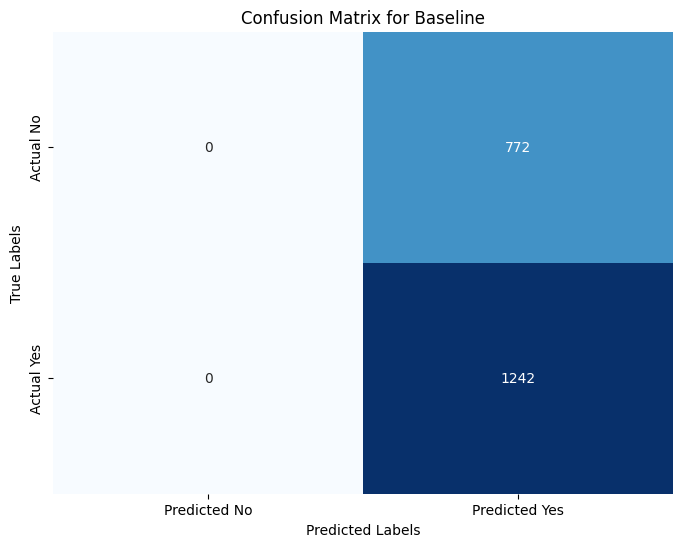

In [412]:
# Print a confusion matrix for visualizing true positives, false positives, etc.
print("Baseline Confusion Matrix:")
cm_baseline=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix for Baseline')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## 7.1 Conclusion
Structure of the Matrix:

Row 1 (True Negatives and False Positives):

    0: True Negatives (cases correctly identified as negative) → None of the negatives were correctly classified.
    
    772: False Positives (cases incorrectly identified as positive) → All 772 actual negatives were misclassified as positives.
    
Row 2 (False Negatives and True Positives):

    0: False Negatives (cases incorrectly identified as negative) → None of the positives were misclassified as negatives.
    
    1242: True Positives (cases correctly identified as positive) → All 1242 actual positives were correctly classified.

### Interpretation:
The model completely ignored the negative class and predicted all instances as belonging to the positive class.

This is often the result of an imbalanced dataset, where the model defaults to the majority class (in this case, the positive class) because of a lack of differentiation between the two classes.

# 8 Logistic Regression

In [413]:
lr_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state = 42))])
lr_model = lr_pipe.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

Logistic regression Accuracy: 0.9448857994041708


Logistic regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.92       772
           1       0.92      0.99      0.96      1242

    accuracy                           0.94      2014
   macro avg       0.95      0.93      0.94      2014
weighted avg       0.95      0.94      0.94      2014



Logistic Regression Confusion Matrix:
[[ 671  101]
 [  10 1232]]
Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.99      0.87      0.92       772
           1       0.92      0.99      0.96      1242

    accuracy                           0.94      2014
   macro avg       0.95      0.93      0.94      2014
weighted avg       0.95      0.94      0.94      2014



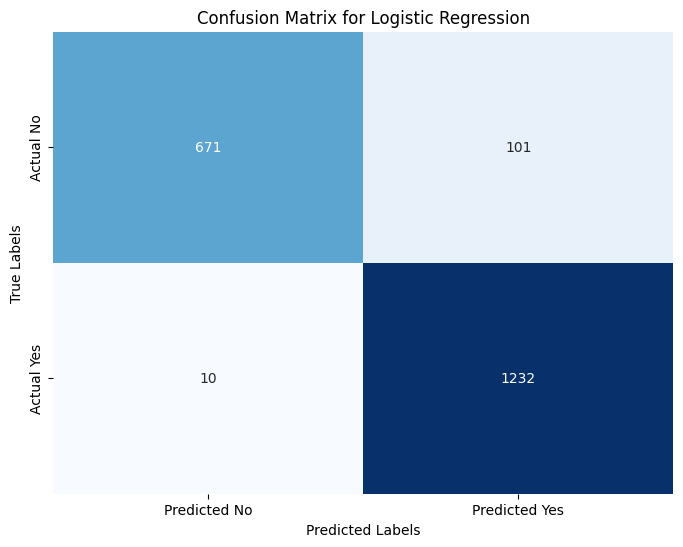

In [414]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic regression Accuracy: {accuracy}")
print("\n")

# Print a classification report for more detailed metrics
print("Logistic regression Classification Report:")
print(classification_report(y_test, y_pred))
print("\n")


# Print a confusion matrix for visualizing true positives, false positives, etc.
print("Logistic Regression Confusion Matrix:")
cm_logistic=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## 8.1 Inference Logistic Regression

First row: Refers to the actual negative class (0).

    671: True Negatives (correctly predicted as negative).

    101: False Positives (incorrectly predicted as positive).

Second row: Refers to the actual positive class (1).

    10: False Negatives (incorrectly predicted as negative).

    1232: True Positives (correctly predicted as positive).

The metrics indicate that this Logistic Regression model performs well on both precision and recall, balancing the trade-off between identifying positives (high recall) and minimizing false positives (reasonable precision). This is a vast and drastic improvement on the baseline . Accuracy of 94.5% and overall good scores   

## 8.2 Feature Influence

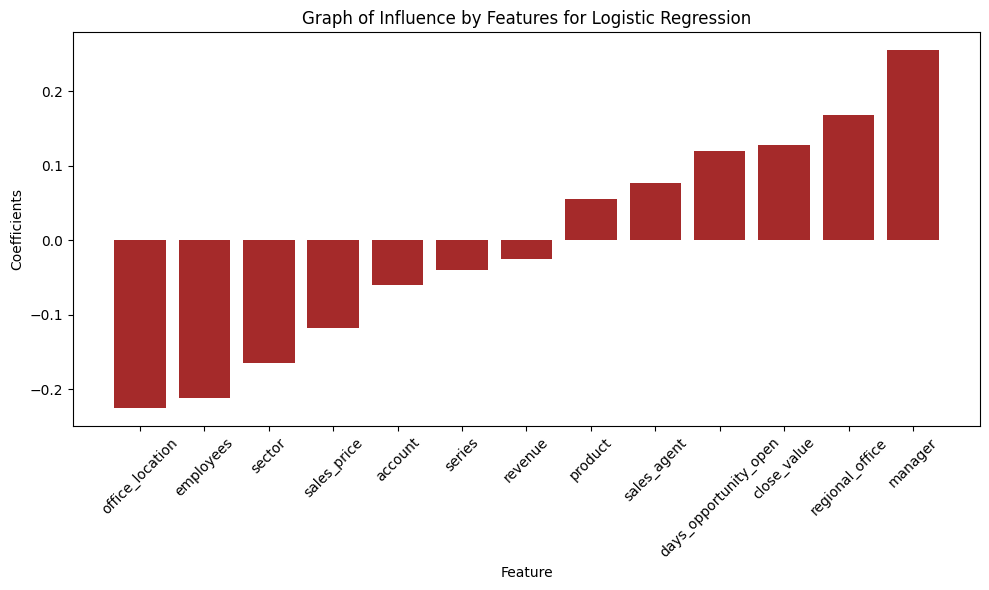

In [415]:
# Display coefficients

logistic_regression_model = lr_model.named_steps['classifier']
feature_influence=[]
for feature, coef in zip(X_train.columns, logistic_regression_model.coef_[0]):
    #print(f"{feature}: {coef}")
    feature_influence.append([feature,float(coef)])

feature_influence_sorted=sorted(feature_influence, key=lambda x: x[1])
#print(type(feature_influence_sorted))
labels = [row[0] for row in feature_influence_sorted]
values = [row[1] for row in feature_influence_sorted]
# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='brown')
plt.title('Graph of Influence by Features for Logistic Regression')
plt.xlabel('Feature')
plt.ylabel('Coefficients')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


## 8.2.1 Logistic Regression: Feature Analysis

1. Sales Manager is the key feature driving the closure of opportunities positively.
2. Regional Office, deal value and number of days of engagement are other values that drive the sale
3. The office location and number of employees( bigger enterprises) hamper the opportunity closer

# 9. Model Comparison

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models. Using the default settings for each of the models, fit and score each. Also, be sure to compare the fit time of each of the models.

                     Time Taken  Train Accuracy  Test Accuracy  Precision  \
Logistic Regression    0.281604        0.958271       0.944886   0.924231   
KNN                    0.037849        0.857356       0.781529   0.924231   
Decision Tree          0.055600        1.000000       1.000000   0.924231   
SVM                    1.976276        0.934852       0.931480   0.924231   

                       Recall  F1 Score  
Logistic Regression  0.991948  0.956893  
KNN                  0.991948  0.956893  
Decision Tree        0.991948  0.956893  
SVM                  0.991948  0.956893  


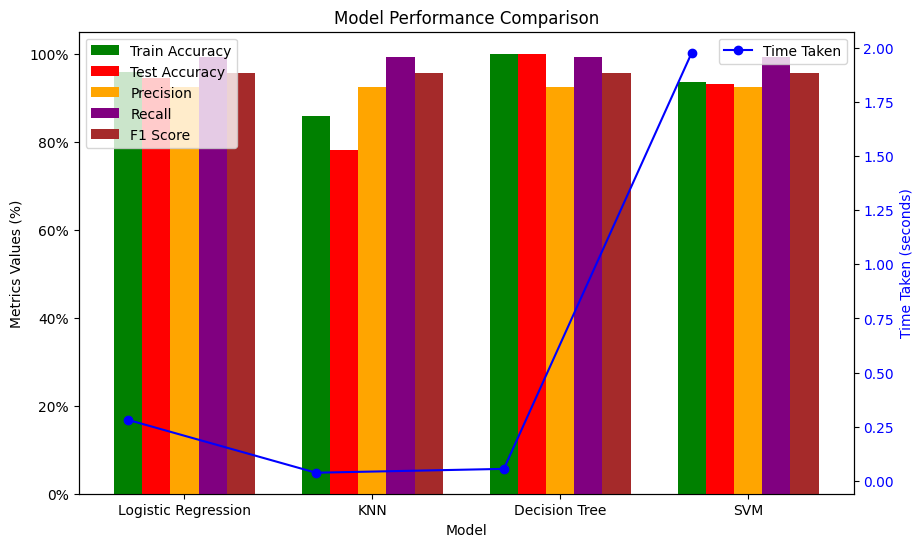

In [416]:
# Models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

results = {}
confusion_matrices = {}
for name, model in models.items():
    # Pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    # Time the training process
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time
    # Calculate train and test accuracy
    train_accuracy = pipeline.score(X_train, y_train)
    test_accuracy = pipeline.score(X_test, y_test)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    # Store the results
    results[name] = {
        'Time Taken': training_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)
# Create a plot
fig, ax1 = plt.subplots(figsize=(10, 6))
# Set bar width and positions
bar_width = 0.15
x = np.arange(len(models))
# Plot each metric as separate bars
metrics = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['green', 'red', 'orange', 'purple', 'brown']
for i, metric in enumerate(metrics):
    ax1.bar(x + i * bar_width, results_df[metric] * 100, width=bar_width, label=metric, color=colors[i], zorder=5)
# Plot time taken as a line on the secondary axis
ax2 = ax1.twinx()
ax2.plot(results_df.index, results_df['Time Taken'], marker='o', linestyle='-', color='blue', label='Time Taken', zorder=10)
ax2.set_ylabel('Time Taken (seconds)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
# Set labels and title
ax1.set_xlabel('Model')
ax1.set_ylabel('Metrics Values (%)')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))
ax1.tick_params(axis='y', labelcolor='black')
# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Model Performance Comparison')
plt.xticks(x + 2 * bar_width, results_df.index)
plt.show()

## 9.1 Summary

| **Model**             | **Time Taken (s)** | **Train Accuracy** | **Test Accuracy** | **Precision** | **Recall** | **F1 Score** |
|-----------------------|--------------------|--------------------|-------------------|---------------|------------|--------------|
| Logistic Regression   | 0.319             | 95.83%             | 94.49%            | 92.42%        | 99.19%     | 95.69%       |
| K-Nearest Neighbors   | 0.033             | 85.74%             | 78.15%            | 92.42%        | 99.19%     | 95.69%       |
| Decision Tree         | 0.058             | 100.0%             | 100.0%            | 92.42%        | 99.19%     | 95.69%       |
| Support Vector Machine| 1.936             | 93.49%             | 93.15%            | 92.42%        | 99.19%     | 95.69%       |


##  9.2 Key Insights
### Fastest Model:

    K-Nearest Neighbors (KNN) is the fastest, taking only 0.033 seconds. It is highly efficient for small datasets or time-sensitive tasks.
    
    Support Vector Machine (SVM) is the slowest, with a runtime of 1.936 seconds, likely due to the computational complexity of high-dimensional calculations.

### Best Accuracy:

    Decision Tree achieves perfect 100% train and test accuracy, which is impressive but may indicate overfitting.
    
    Logistic Regression balances speed and accuracy well, achieving 94.49% test accuracy, making it a solid choice for balanced performance.

### Precision & Recall Consistency:

    All models have identical Precision (92.42%) and Recall (99.19%), which suggests strong predictive performance, especially for positive cases.

### Balanced Performance:

    Every model achieves an F1 Score of 95.69%, indicating a good trade-off between Precision and Recall.

### Scalability Trade-offs:

    SVM is computationally expensive but maintains strong accuracy.

    Logistic Regression and Decision Tree provide excellent results with shorter runtimes, making them practical for many use cases.

### Overfitting:
    Potential case of overfitting for Decision Tree, which makes it less desirable

### Conclusion
    Leverage Logistic Regression or KNN as the model for this use case


# 10: Hyper Parameter Tuning
    Although the base performance all these models are awesome. This is an attempt to show the knowledge of hyper paramter tuning learnt during the course 

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time=   0.0s
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time=   0.0s
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time=   0.0s
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time=   0.0s
[CV] END ..........classifier__C=0.1, classifier__penalty=l1; total time=   0.1s
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time=   0.0s
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time=   0.0s
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time=   0.0s
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time=   0.0s
[CV] END ..........classifier__C=0.1, classifier__penalty=l2; total time=   0.0s
[CV] END ............classifier__C=1, classifier__penalty=l1; total time=   5.4s
[CV] END ............classifier__C=1, classifier_

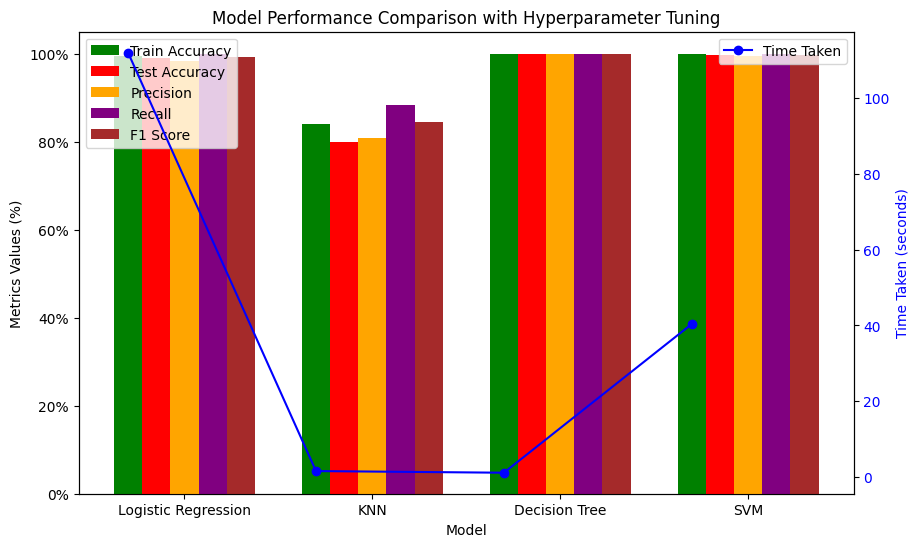

In [417]:
hp_models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, solver='liblinear'),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['l1', 'l2']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 10]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'classifier__max_depth': [None, 5, 10]
        }
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf']
        }
    }
}

results = {}

for name, config in hp_models.items():
    # Pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', config['model'])])

    # Hyperparameter tuning using GridSearchCV, verbose to check if the program got killed or working in the background :-)
    grid_search = GridSearchCV(pipeline, config['params'], cv=5, verbose=2)
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    # Predict on test set using best parameters
    y_pred = grid_search.predict(X_test)

    # Calculate metrics
    train_accuracy = grid_search.score(X_train, y_train)
    test_accuracy = grid_search.score(X_test, y_test)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    # Store the results
    results[name] = {
        'Time Taken': training_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Best Parameters': grid_search.best_params_
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Create a plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set bar width and positions
bar_width = 0.15
x = np.arange(len(models))

# Plot each metric as separate bars
metrics = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['green', 'red', 'orange', 'purple', 'brown']
for i, metric in enumerate(metrics):
    ax1.bar(x + i * bar_width, results_df[metric] * 100, width=bar_width, label=metric, color=colors[i], zorder=5)

# Plot time taken as a line on the secondary axis
ax2 = ax1.twinx()
ax2.plot(results_df.index, results_df['Time Taken'], marker='o', linestyle='-', color='blue', label='Time Taken', zorder=10)
ax2.set_ylabel('Time Taken (seconds)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Set labels and title
ax1.set_xlabel('Model')
ax1.set_ylabel('Metrics Values (%)')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))
ax1.tick_params(axis='y', labelcolor='black')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Model Performance Comparison with Hyperparameter Tuning')
plt.xticks(x + 2 * bar_width, results_df.index)
plt.show()

## Inference and Summary


| Model               | Time Taken | Train Accuracy | Test Accuracy | Precision | Recall   | F1 Score |
|---------------------|------------|----------------|---------------|-----------|----------|----------|
| Logistic Regression | 112.057739 | 0.995955       | 0.989573      | 0.98414   | 0.999195 | 0.99161  |
| KNN                 | 1.504548   | 0.840749       | 0.799404      | 0.808997  | 0.883253 | 0.844496 |
| Decision Tree       | 1.066199   | 1.0            | 1.0           | 1.0       | 1.0      | 1.0      |
| SVM                 | 40.36159   | 0.999787       | 0.996524      | 0.995188  | 0.999195 | 0.997188 |



## 10.2 Key Insights

### Fastest Model:

    KNN is the fastest model, taking only 1.5 seconds to train

    Logistic Regression is the slowest, with a runtime of 112 seconds, likely due to its iterative optimization process.

### Best Accuracy:

    Decision Tree achieves perfect 100% train and test accuracy, but this likely indicates overfitting.

    SVM provides excellent test accuracy (99.65%) with strong generalization.

    Logistic Regression balances speed and accuracy well, achieving 98.96% test accuracy.

### Precision & Recall Consistency:

    Decision Tree has perfect precision and recall (1.0), but this may not generalize well.

    Logistic Regression and SVM maintain high precision (~99.5%) and recall (~99.9%), ensuring robust predictive performance.

    KNN has the lowest precision (80.9%) and recall (88.3%), making it less reliable for critical tasks.

### Balanced Performance:

    Logistic Regression and SVM achieve high F1 scores (~99%), indicating a good trade-off between precision and recall.

    Decision Tree, while perfect in metrics, risks overfitting.

### Conclusion:

 For practical use cases:

    Logistic Regression or SVM are the best choices due to their balance of speed, accuracy, and generalization.

    Avoid Decision Tree unless overfitting is addressed.

    Use KNN only for simple or small datasets where speed is critical